# Test of Azure Anomaly Detection service

This notebook is a trial to understand the potential of Azure Anomaly detection service apply to fraud detection and analysis for forensic services.

All the data used here are synthetic and do not represent any real data.


Azure service Docs:
https://azure.microsoft.com/pt-br/services/cognitive-services/anomaly-detector/#overview


- [`0-Import libs`](#0-import-libs)
- [`1-Test with a random data`](#1-Test-with-a-random-data)
- [`2-Test with a random data using REST API`](#2-Test-with-a-random-data-using-REST-API)
- [`3-Test with REST API using sinoidal data`](#3-Test-with-REST-API-using-sinoidal-data)
- [`4-Conclusion`](#4-Conclusion)

### 0-Import libs

In [111]:
from azure.cognitiveservices.anomalydetector import AnomalyDetectorClient
from azure.cognitiveservices.anomalydetector.models import Request, Point, Granularity, \
    APIErrorException
from msrest.authentication import CognitiveServicesCredentials
import pandas as pd
import os

import seaborn as sns
import matplotlib.ticker as ticker

sns.set()

Set credentials and table name

In [2]:
SUBSCRIPTION_KEY = "*****************"
ANOMALY_DETECTOR_ENDPOINT = "******************"

TIME_SERIES_DATA_PATH = "Teste_random.csv"

### 1-Test with a random data

The first data to look like are a time series data built synthectic looking over a financial datas to build a comparible result and then some randomized entries have their value changed manually, to produce anoamlies which could be verified.

This first test will be done using Client lib provided by microsoft

In [3]:
client = AnomalyDetectorClient(ANOMALY_DETECTOR_ENDPOINT, CognitiveServicesCredentials(SUBSCRIPTION_KEY))

Reading and parsing data

In [4]:
series = []
data_file = pd.read_csv(TIME_SERIES_DATA_PATH, sep=';', header=0, encoding='utf-8')\
        .drop(["Unnamed: 4","Unnamed: 5"],axis=1)
data_file["data"]=pd.to_datetime(data_file["data"])

The free azure service do not support more than 8640 entries, so the data will be limited

In [5]:
data_file=data_file.iloc[:5000] 

In [6]:
for index, row in data_file.iterrows():
    series.append(Point(timestamp=row[0], value=row[2]))

Making Request

In [7]:
request = Request(series=series, granularity=Granularity.daily)

In [8]:
print('Detecting anomalies in the entire time series.')

try:
    response = client.entire_detect(request)
except Exception as e:
    if isinstance(e, APIErrorException):
        print('Error code: {}'.format(e.error.code),
            'Error message: {}'.format(e.error.message))
    else:
        print(e)

if True in response.is_anomaly:
    print('An anomaly was detected at index:')
    for i in range(len(response.is_anomaly)):
        if response.is_anomaly[i]:
            print(i)
else:
    print('No anomalies were detected in the time series.')

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Detecting anomalies in the entire time series.


Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Error code: InvalidSeries Error message: The 'series' field must be sorted by timestamp in ascending order.


NameError: name 'response' is not defined

Due to wrong datetime format, the service do not return any successed response

### 2-Test with a random data using REST API

Same data from test 1.
This first test will be done using Client lib provided by microsoft

Setting up credentials:

In [13]:
SUBSCRIPTION_KEY = "***********"
ANOMALY_DETECTOR_ENDPOINT = "********************"

TIME_SERIES_DATA_PATH = "Teste_random.csv"
ANOMALY_DETECTOR_ENDPOINT=ANOMALY_DETECTOR_ENDPOINT+'anomalydetector/v1.0/timeseries/entire/detect'

Import libs

In [14]:
import requests
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\ihfreitas\AppData\Local\Continuum\anaconda3\envs\anomaly_detection_tst\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [15]:
from bokeh.plotting import figure,output_notebook, show
from bokeh.palettes import Blues4
from bokeh.models import ColumnDataSource,Slider
import datetime
from bokeh.io import push_notebook
from dateutil import parser
from ipywidgets import interact, widgets, fixed
output_notebook()

Loading BokehJS ...

Build auxiliar function

In [16]:
def detect(endpoint, apikey, request_data):
    """
    Azure Anomaly detection Rest API client. This function execute the service from azure using a rest api endpoint provided by user.
    Args:
        endpoint (str): Azure Anomaly detection service enpoint
        apoikey (str): Key to authenticate the service
        request_date (pandas.Series): pandas series with index being dates and values being data to find anomalies
    Return:
        data with markers as anomalies or exception
    Example:
        >>>> endpoint='https://azure****'
        >>>> apikey='********'
        >>>> request_data=pd.Series([1,2,3,4,5,6,100,8,9,10], index=pd.date_range(start='2019-01-01',end='2019-01-10'))
        >>>> detect(endpoint, apikey, request_data)
    """
    headers = {'Content-Type': 'application/json', 'Ocp-Apim-Subscription-Key': apikey}
    response = requests.post(endpoint, data=json.dumps(request_data), headers=headers)
    if response.status_code == 200:
        return json.loads(response.content.decode("utf-8"))
    else:
        print(response.status_code)
        raise Exception(response.text)

Checking and parsing Data

In [17]:
data_file.head()

,data,Esperado,Verificado,Check
0,1990-01-01,49.94,49.94,True
1,1990-02-01,89.09,89.09,True
2,1990-03-01,73.76,73.76,True
3,1990-04-01,22.14,22.14,True
4,1990-05-01,90.00,90.00,True


In [20]:
data_file["data"]=pd.to_datetime(data_file["data"])
data_file["Verificado"]=data_file["Verificado"].astype(np.float64)

To simulate a real usage of the service, the data will be parsed into a json.

In [28]:
data_file[["data","Verificado"]
         ].sort_values("data").rename(columns={"data":"timestamp",
                          "Verificado":"value"}).to_json("tst.json",orient="records",date_format="iso")

In [29]:
sample_data={}
sample_data_ = json.load(open('tst.json'))
sample_data['granularity'] = 'daily'
sample_data['series'] = sample_data_
sample_data['sensitivity'] = 95

In [30]:
sample_data

{'granularity': 'daily',
 'series': [{'timestamp': '1990-01-01T00:00:00.000Z', 'value': 49.94},
  {'timestamp': '1990-01-02T00:00:00.000Z', 'value': 1.01},
  {'timestamp': '1990-01-03T00:00:00.000Z', 'value': 22.91},
  {'timestamp': '1990-01-04T00:00:00.000Z', 'value': 35.92},
  {'timestamp': '1990-01-05T00:00:00.000Z', 'value': 44.48},
  {'timestamp': '1990-01-06T00:00:00.000Z', 'value': 62.08},
  {'timestamp': '1990-01-07T00:00:00.000Z', 'value': 69.98},
  {'timestamp': '1990-01-08T00:00:00.000Z', 'value': 90.33},
  {'timestamp': '1990-01-09T00:00:00.000Z', 'value': 60.49},
  {'timestamp': '1990-01-10T00:00:00.000Z', 'value': 86.6},
  {'timestamp': '1990-01-11T00:00:00.000Z', 'value': 38.62},
  {'timestamp': '1990-01-12T00:00:00.000Z', 'value': 30.11},
  {'timestamp': '1990-01-13T00:00:00.000Z', 'value': 79.94},
  {'timestamp': '1990-01-14T00:00:00.000Z', 'value': 27.08},
  {'timestamp': '1990-01-15T00:00:00.000Z', 'value': 29.8},
  {'timestamp': '1990-01-16T00:00:00.000Z', 'value': 

Running function

In [31]:
result = detect(ANOMALY_DETECTOR_ENDPOINT, SUBSCRIPTION_KEY, sample_data)

In [32]:
result

{'expectedValues': [53.09784394059617,
  53.092982043576605,
  53.08812014655704,
  53.083258249537465,
  53.0783963525179,
  53.07353445549833,
  53.06867255847876,
  53.06381066145919,
  53.05894876443963,
  53.05408686742006,
  53.04922497040049,
  53.04436307338092,
  53.039501176361355,
  53.03463927934178,
  53.029777382322216,
  53.02491548530265,
  53.020053588283076,
  53.01519169126351,
  53.010329794243944,
  53.00546789722437,
  53.000606000204805,
  52.99574410318524,
  52.990882206165665,
  52.9860203091461,
  52.98115841212653,
  52.97629651510697,
  52.97143461808739,
  52.96657272106783,
  52.96171082404826,
  52.95684892702869,
  52.95198703000912,
  52.947125132989555,
  52.94226323596998,
  52.937401338950416,
  52.93253944193085,
  52.927677544911276,
  52.92281564789171,
  52.917953750872144,
  52.91309185385257,
  52.908229956833004,
  52.90336805981344,
  52.898506162793865,
  52.8936442657743,
  52.88878236875473,
  52.883920471735166,
  52.87905857471559,
  52

Parsing Results

In [33]:
columns = {'expectedValues': result['expectedValues'], 'isAnomaly': result['isAnomaly'], 'isNegativeAnomaly': result['isNegativeAnomaly'],
           'isPositiveAnomaly': result['isPositiveAnomaly'], 'upperMargins': result['upperMargins'], 'lowerMargins': result['lowerMargins'],
           'timestamp': [parser.parse(x['timestamp']) for x in sample_data['series']], 
           'value': [x['value'] for x in sample_data['series']]}
response = pd.DataFrame(data=columns)

In [34]:
response

,expectedValues,isAnomaly,isNegativeAnomaly,isPositiveAnomaly,upperMargins,lowerMargins,timestamp,value
0,53.097844,False,False,False,3.189422,3.189422,1990-01-01 00:00:00+00:00,49.94
1,53.092982,False,False,False,52.603812,52.603812,1990-01-02 00:00:00+00:00,1.01
2,53.088120,False,False,False,30.479901,30.479901,1990-01-03 00:00:00+00:00,22.91
3,53.083258,False,False,False,17.334891,17.334891,1990-01-04 00:00:00+00:00,35.92
4,53.078396,False,False,False,8.684380,8.684380,1990-01-05 00:00:00+00:00,44.48
...,...,...,...,...,...,...,...,...
4995,56.870964,False,False,False,55.478326,55.478326,2003-12-04 00:00:00+00:00,111.80
4996,56.876625,False,False,False,33.676808,33.676808,2003-12-05 00:00:00+00:00,90.22
4997,56.882286,False,False,False,4.946691,4.946691,2003-12-06 00:00:00+00:00,61.78
4998,56.887947,False,False,False,56.497327,56.497327,2003-12-07 00:00:00+00:00,0.95


Plotting results to check

In [36]:
values = response['value']
label = response['timestamp']
anomalies = []
anomaly_labels = []
index = 0
anomaly_indexes = []
p = figure(x_axis_type='datetime', title="Batch Anomaly Detection ({0} Sensitvity)"\
               .format("95"), width=800, height=600)
for anom in response['isAnomaly']:
    if anom == True and (values[index] > response.iloc[index]['expectedValues'] + response.iloc[index]['upperMargins'] or 
                         values[index] < response.iloc[index]['expectedValues'] - response.iloc[index]['lowerMargins']):
        anomalies.append(values[index])
        anomaly_labels.append(label[index])
        anomaly_indexes.append(index)
    index = index+1
upperband = response['expectedValues'] + response['upperMargins']
lowerband = response['expectedValues'] -response['lowerMargins']
band_x = np.append(label, label[::-1])
band_y = np.append(lowerband, upperband[::-1])
boundary = p.patch(band_x, band_y, color=Blues4[2], fill_alpha=0.5, line_width=1, legend='Boundary')
p.line(label, values, legend='Value', color="#2222aa", line_width=1)
p.line(label, response['expectedValues'], legend='ExpectedValue',  line_width=1, line_dash="dotdash", line_color='olivedrab')
anom_source = ColumnDataSource(dict(x=anomaly_labels, y=anomalies))
anoms = p.circle('x', 'y', size=5, color='tomato', source=anom_source)
p.legend.border_line_width = 1
p.legend.background_fill_alpha  = 0.1
show(p, notebook_handle=True)

Here the service do not provide any insight related to the real anomalies, but as a temporal analysis this errors are most likely due the wrong date formating. This fix will be done in the future

### 3-Test with REST API using sinoidal data

To produce another type of temporal behavior (anti-persistent) a sysnthetic data were produced using sin function.

In [69]:
data_df=pd.read_csv("Teste_sin.csv",sep=';',dtype={
    "timestamp":str,
    "orig":np.float64,
    "mod":np.float64})

In [70]:
data_df["timestamp"]=pd.to_datetime(data_df["timestamp"])

In [71]:
data_df

,timestamp,orig,mod
0,2019-01-01,-0.18,-0.18
1,2019-02-01,0.62,0.62
2,2019-03-01,1.40,1.40
3,2019-04-01,1.84,1.84
4,2019-05-01,0.22,0.22
...,...,...,...
594,2020-08-17,0.94,0.94
595,2020-08-18,0.34,0.34
596,2020-08-19,-0.82,-0.82
597,2020-08-20,-0.43,-0.43


As done before, the data were modified to json

In [72]:
data_df[["timestamp","mod"]
         ].sort_values("timestamp").rename(columns={
                          "mod":"value"}).to_json("tst.json",orient="records",date_format="iso")

In [73]:
sample_data={}
sample_data_ = json.load(open('tst.json'))
sample_data['granularity'] = 'daily'
sample_data['series'] = sample_data_
sample_data['sensitivity'] = 95

In [74]:
sample_data

{'granularity': 'daily',
 'series': [{'timestamp': '2019-01-01T00:00:00.000Z', 'value': -0.18},
  {'timestamp': '2019-01-02T00:00:00.000Z', 'value': -0.4},
  {'timestamp': '2019-01-03T00:00:00.000Z', 'value': 1.68},
  {'timestamp': '2019-01-04T00:00:00.000Z', 'value': 1.42},
  {'timestamp': '2019-01-05T00:00:00.000Z', 'value': -0.14},
  {'timestamp': '2019-01-06T00:00:00.000Z', 'value': 0.03},
  {'timestamp': '2019-01-07T00:00:00.000Z', 'value': -0.75},
  {'timestamp': '2019-01-08T00:00:00.000Z', 'value': 0.18},
  {'timestamp': '2019-01-09T00:00:00.000Z', 'value': 0.78},
  {'timestamp': '2019-01-10T00:00:00.000Z', 'value': 1.38},
  {'timestamp': '2019-01-11T00:00:00.000Z', 'value': 1.67},
  {'timestamp': '2019-01-12T00:00:00.000Z', 'value': 0.62},
  {'timestamp': '2019-01-13T00:00:00.000Z', 'value': -0.8},
  {'timestamp': '2019-01-14T00:00:00.000Z', 'value': 0.3},
  {'timestamp': '2019-01-15T00:00:00.000Z', 'value': 0.55},
  {'timestamp': '2019-01-16T00:00:00.000Z', 'value': 0.98},
  {

In [75]:
result = detect(ANOMALY_DETECTOR_ENDPOINT, SUBSCRIPTION_KEY, sample_data)

Parsing and plotting results

In [76]:
columns = {'expectedValues': result['expectedValues'], 'isAnomaly': result['isAnomaly'], 'isNegativeAnomaly': result['isNegativeAnomaly'],
           'isPositiveAnomaly': result['isPositiveAnomaly'], 'upperMargins': result['upperMargins'], 'lowerMargins': result['lowerMargins'],
           'timestamp': [parser.parse(x['timestamp']) for x in sample_data['series']], 
           'value': [x['value'] for x in sample_data['series']]}
response = pd.DataFrame(data=columns)

In [82]:
values = response['value']
label = response['timestamp']
anomalies = []
anomaly_labels = []
index = 0
anomaly_indexes = []
p = figure(x_axis_type='datetime', title="Batch Anomaly Detection ({0} Sensitvity)"\
               .format("95"), width=800, height=600)
for anom in response['isAnomaly']:
    if anom == True and (values[index] > response.iloc[index]['expectedValues'] + response.iloc[index]['upperMargins'] or 
                         values[index] < response.iloc[index]['expectedValues'] - response.iloc[index]['lowerMargins']):
        anomalies.append(values[index])
        anomaly_labels.append(label[index])
        anomaly_indexes.append(index)
    index = index+1
upperband = response['expectedValues'] + response['upperMargins']
lowerband = response['expectedValues'] -response['lowerMargins']
band_x = np.append(label, label[::-1])
band_y = np.append(lowerband, upperband[::-1])
boundary = p.patch(band_x, band_y, color=Blues4[2], fill_alpha=0.5, line_width=1, legend='Boundary')
p.line(label, data_df["orig"], legend='Original',color="#FF0000", line_width=1)
p.line(label, values, legend='Value', color="#2222aa", line_width=1)
#p.line(label, response['expectedValues'], legend='ExpectedValue',  line_width=1, line_dash="dotdash", line_color='olivedrab')
p.line(label, response['value'], legend='ObservedValue',  line_width=1, line_dash="dotdash", line_color='olivedrab')
anom_source = ColumnDataSource(dict(x=anomaly_labels, y=anomalies))
anoms = p.circle('x', 'y', size=5, color='tomato', source=anom_source)
p.legend.border_line_width = 1
p.legend.background_fill_alpha  = 0.1
show(p, notebook_handle=True)

In [95]:
response["timestamp"]=pd.to_datetime(response["timestamp"])
response["timestamp"]=response["timestamp"].dt.date
response["timestamp"]=pd.to_datetime(response["timestamp"])

Improving visualization by parsing all the response

In [96]:
response

,expectedValues,isAnomaly,isNegativeAnomaly,isPositiveAnomaly,upperMargins,lowerMargins,timestamp,value
0,1.035858,False,False,False,1.228017,1.228017,2019-01-01,-0.18
1,1.347452,True,True,False,0.067373,0.067373,2019-01-02,-0.40
2,1.359435,False,False,False,0.323771,0.323771,2019-01-03,1.68
3,0.523531,False,False,False,0.905434,0.905434,2019-01-04,1.42
4,-0.258989,False,False,False,0.120178,0.120178,2019-01-05,-0.14
...,...,...,...,...,...,...,...,...
594,0.250334,False,False,False,0.575363,0.575363,2020-12-04,0.82
595,-0.379793,False,False,False,0.050709,0.050709,2020-12-05,-0.43
596,-0.259542,False,False,False,0.101463,0.101463,2020-12-06,-0.36
597,0.107385,False,False,False,0.270059,0.270059,2020-12-07,-0.16


In [97]:
data_df.sort_values("timestamp")
data_df["timestamp"]=pd.to_datetime(data_df["timestamp"])

In [98]:
tst=response.merge(data_df[["timestamp","orig"]],on="timestamp")

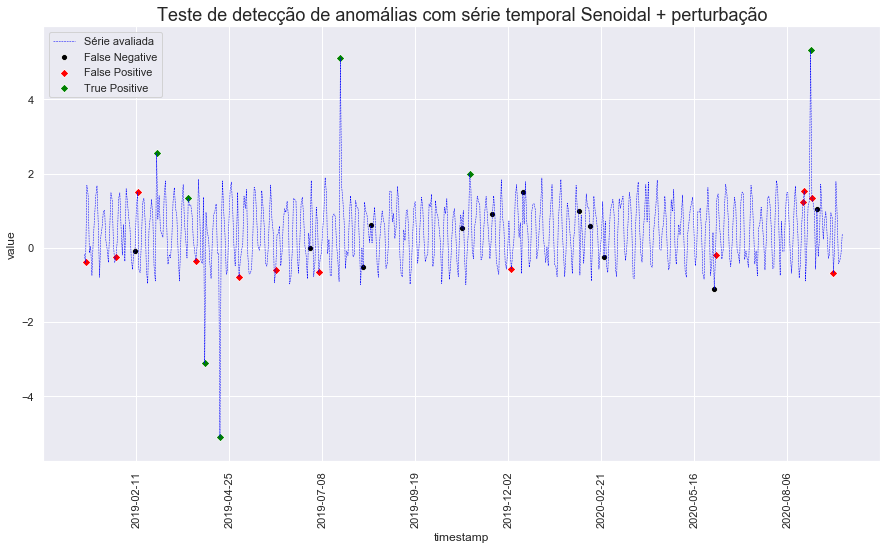

In [149]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,8))

sns.lineplot(x="timestamp",y="value",data=tst.astype({"timestamp":str}),label="Série avaliada", 
            color="blue",linewidth=0.5)
#sns.lineplot(x="timestamp",y="orig",data=tst.astype({"timestamp":str}),label="Esperados")

sns.scatterplot(x="timestamp",y="value",data=tst[
                    (tst["orig"]!=tst["value"])&(~(tst["isAnomaly"]))
                             ].astype({"timestamp":str}),
               label="False Negative",color="black")

sns.scatterplot(x="timestamp",y="value",data=tst[
    (tst["orig"]==tst["value"])&((tst["isAnomaly"]))
                                                ].astype({"timestamp":str}),
               label="False Positive",marker="D",color="red")

sns.scatterplot(x="timestamp",y="value",data=tst[
                                (tst["isAnomaly"])&(tst["orig"]!=tst["value"])
                                        ].astype({"timestamp":str}),
               label="True Positive",marker="D",color="green")
plt.xticks(rotation=90)
ax.lines[0].set_linestyle("--")
ax.xaxis.set_major_locator(ticker.LinearLocator(10))

    
plt.title("Teste de detecção de anomálias com série temporal Senoidal + perturbação",
         fontsize=18)
plt.legend()


### 4-Conclusion

As seen, the service are promise but is heavly based upon temporal patterns, in the easier test (using senoidal data) a highly false positive rate are verified, and even if we disconsider the false negative rate (the peaks and valleys are easy to detect, but all false negative points are very difficult to classify and due that in particular applications this rate could be overpassed - for instance, on detecting anomalies in machines behavior, such vibrations of a electric component, only the peaks and valleys really matter). However, the service do not shown maturity enough to be used in forensic services.